# Fast Fourier transform - manually calculating length 8 FFT

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from IPython.display import display, Image

## Reference input signal

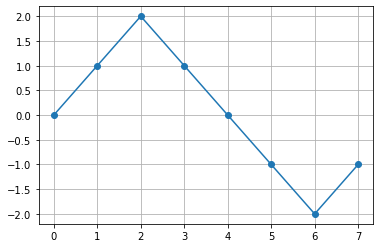

In [2]:
x = np.array([0, 1, 2, 1, 0, -1, -2, -1])

plt.plot(x, "o-")
plt.grid(True)
pass

In [3]:
def show(X, color="C0"):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(6, 3), sharex=True, sharey=True)
    ax1.plot(np.real(X), "o-", color=color)
    ax2.plot(np.imag(X), "o-", color=color)
    for ax in (ax1, ax2):
        ax.grid(True)
    fig.tight_layout()

## Numpy FFT

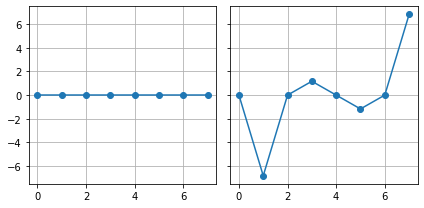

In [4]:
X_np = np.fft.fft(x)
show(X_np)

## Direct DFT

[ True  True  True  True  True  True  True  True]


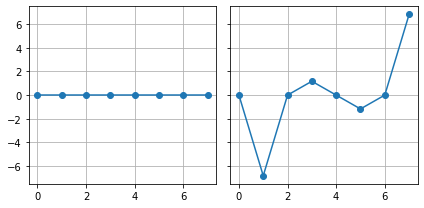

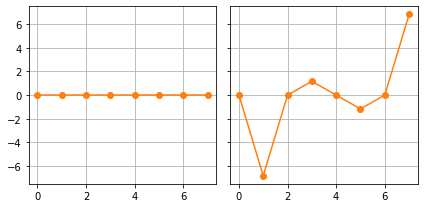

In [5]:
N = 8
X_dft = np.zeros(N, dtype=complex)
for m in range(N):
    for n in range(N):
        X_dft[m] += x[n] * np.exp(-2j*np.pi*n*m/N)

show(X_np, color="C0")
show(X_dft, color="C1")
print(np.isclose(X_np, X_dft))

## Decimation-in-frequency 1

Lyons figure 4-11

Note that `W[0] = 1` and `W[4] = -1`.

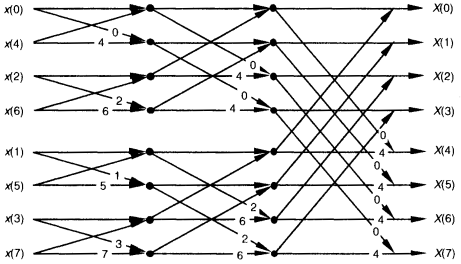

In [6]:
display(Image("img/lyons_figure_4_11.png"))

[ True  True  True  True  True  True  True  True]


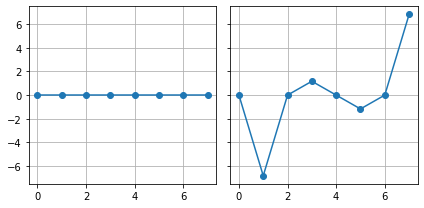

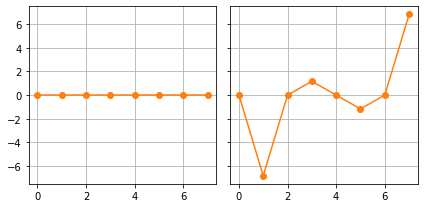

In [7]:
N = 8
n = np.arange(N)
X = np.zeros(N, dtype=complex)
W = np.exp(-2j*np.pi/N)**n

# Bit-reversed inputs
X = x[[0, 4, 2, 6, 1, 5, 3, 7]].copy().astype(complex)

# Stage 1
X[0], X[1] = (X[0]+X[1]), (X[1]*W[4]+X[0]*W[0])
X[2], X[3] = (X[2]+X[3]), (X[3]*W[6]+X[2]*W[2])
X[4], X[5] = (X[4]+X[5]), (X[5]*W[5]+X[4]*W[1])
X[6], X[7] = (X[6]+X[7]), (X[7]*W[7]+X[6]*W[3])

# Stage 2
X[0], X[2] = (X[0]+X[2]), (X[2]*W[4]+X[0]*W[0])
X[1], X[3] = (X[1]+X[3]), (X[3]*W[4]+X[1]*W[0])
X[4], X[6] = (X[4]+X[6]), (X[6]*W[6]+X[4]*W[2])
X[5], X[7] = (X[5]+X[7]), (X[7]*W[6]+X[5]*W[2])

# Stage 3
X[0], X[4] = (X[0]+X[4]), (X[4]*W[4]+X[0]*W[0])
X[1], X[5] = (X[1]+X[5]), (X[5]*W[4]+X[1]*W[0])
X[2], X[6] = (X[2]+X[6]), (X[6]*W[4]+X[2]*W[0])
X[3], X[7] = (X[3]+X[7]), (X[7]*W[4]+X[3]*W[0])

X_dif1 = X

show(X_np, color="C0")
show(X_dif1, color="C1")
print(np.isclose(X_np, X_dif1))

## Decimation-in-time 1

Lyons figure 4-8

Note that `W[0] = 1` and `W[4] = -1`.

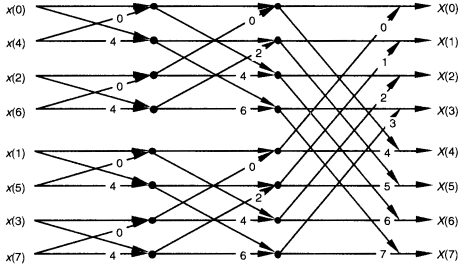

In [8]:
display(Image("img/lyons_figure_4_8.png"))

[ True  True  True  True  True  True  True  True]


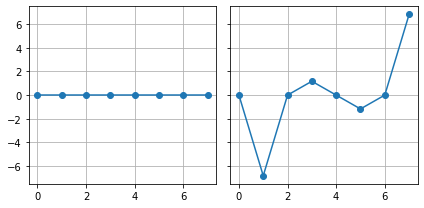

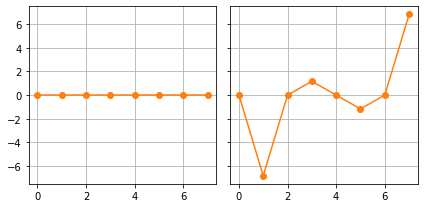

In [9]:
N = 8
n = np.arange(N)
X = np.zeros(N, dtype=complex)
W = np.exp(-2j*np.pi/N)**n

# Bit-reversed inputs
X = x[[0, 4, 2, 6, 1, 5, 3, 7]].copy().astype(complex)

# Stage 1
X[0], X[1] = (X[0]+X[1]*W[0]), (X[1]*W[4]+X[0])
X[2], X[3] = (X[2]+X[3]*W[0]), (X[3]*W[4]+X[2])
X[4], X[5] = (X[4]+X[5]*W[0]), (X[5]*W[4]+X[4])
X[6], X[7] = (X[6]+X[7]*W[0]), (X[7]*W[4]+X[6])

# Stage 2
X[0], X[2] = (X[0]+X[2]*W[0]), (X[2]*W[4]+X[0])
X[1], X[3] = (X[1]+X[3]*W[2]), (X[3]*W[6]+X[1])
X[4], X[6] = (X[4]+X[6]*W[0]), (X[6]*W[4]+X[4])
X[5], X[7] = (X[5]+X[7]*W[2]), (X[7]*W[6]+X[5])

# Stage 3
X[0], X[4] = (X[0]+X[4]*W[0]), (X[4]*W[4]+X[0])
X[1], X[5] = (X[1]+X[5]*W[1]), (X[5]*W[5]+X[1])
X[2], X[6] = (X[2]+X[6]*W[2]), (X[6]*W[6]+X[2])
X[3], X[7] = (X[3]+X[7]*W[3]), (X[7]*W[7]+X[3])

X_dit1 = X

show(X_np, color="C0")
show(X_dit1, color="C1")
print(np.isclose(X_np, X_dit1))

## Decimation in frequency 2

Meyer-Baese Figure 6.13

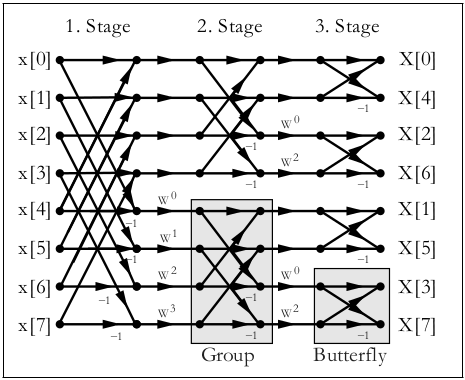

In [10]:
display(Image("img/baese_figure_6_13.png"))

[ True  True  True  True  True  True  True  True]


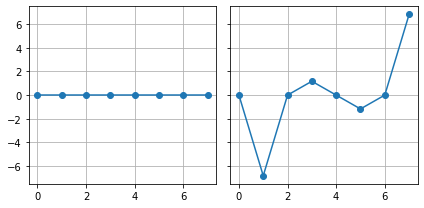

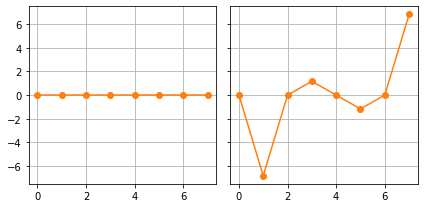

In [11]:
N = 8
n = np.arange(N)
X = np.zeros(N, dtype=complex)
W = np.exp(-2j*np.pi/N)**n

# Load data
X = x.copy().astype(complex)

# Stage 1 - 1 group, 4 butterflies per group
X[0], X[4] = (X[0]+X[4]), (X[0]-X[4])*W[0]
X[1], X[5] = (X[1]+X[5]), (X[1]-X[5])*W[1]
X[2], X[6] = (X[2]+X[6]), (X[2]-X[6])*W[2]
X[3], X[7] = (X[3]+X[7]), (X[3]-X[7])*W[3]

# Stage 2 - 2 groups, 2 butterflies per group
X[0], X[2] = (X[0]+X[2]), (X[0]-X[2])*W[0]
X[1], X[3] = (X[1]+X[3]), (X[1]-X[3])*W[2]
X[4], X[6] = (X[4]+X[6]), (X[4]-X[6])*W[0]
X[5], X[7] = (X[5]+X[7]), (X[5]-X[7])*W[2]

# Stage 3 - 4 groups, 1 butterfly per group
X[0], X[1] = (X[0]+X[1]), (X[0]-X[1])
X[2], X[3] = (X[2]+X[3]), (X[2]-X[3])
X[4], X[5] = (X[4]+X[5]), (X[4]-X[5])
X[6], X[7] = (X[6]+X[7]), (X[6]-X[7])

# Bit-reversed indexing
X = X[[0, 4, 2, 6, 1, 5, 3, 7]]

X_dif2 = X
show(X_np, color="C0")
show(X_dif2, color="C1")
print(np.isclose(X_np, X_dif2))